In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../Dataset/weather_merged_2/add_feature_trafficData158324.csv", dtype = str)
df.head(3)

,year,month,day,hour,REPORT_ID,avgMeasuredTime,vehicleCount,avgSpeed
0,2014,08,01,07,158324,73.5,11,50.0
1,2014,08,01,08,158324,63.833333333333336,78,57.583333333333336
2,2014,08,01,09,158324,61.833333333333336,75,59.583333333333336


In [14]:
df_1_8 = df[(df['month'] == '08') & (df['day'] == '01')]
df_1_8.head(3)

,year,month,day,hour,REPORT_ID,avgMeasuredTime,vehicleCount,avgSpeed
0,2014,08,01,07,158324,73.5,11,50.0
1,2014,08,01,08,158324,63.833333333333336,78,57.583333333333336
2,2014,08,01,09,158324,61.833333333333336,75,59.583333333333336


In [15]:
df_1_8['datetime'] = df_1_8['year'].astype(str) + '-' + df_1_8['month'].astype(str) + '-' + df_1_8['day'].astype(str) + ' ' + df_1_8['hour'].astype(str)
df_1_8.head(3)

C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_600/3921755651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_8['datetime'] = df_1_8['year'].astype(str) + '-' + df_1_8['month'].astype(str) + '-' + df_1_8['day'].astype(str) + ' ' + df_1_8['hour'].astype(str)


,year,month,day,hour,REPORT_ID,avgMeasuredTime,vehicleCount,avgSpeed,datetime
0,2014,08,01,07,158324,73.5,11,50.0,2014-08-01 07
1,2014,08,01,08,158324,63.833333333333336,78,57.583333333333336,2014-08-01 08
2,2014,08,01,09,158324,61.833333333333336,75,59.583333333333336,2014-08-01 09


In [16]:
df_1_8['datetime'] = pd.to_datetime(df_1_8['datetime'], format='%Y-%m-%d %H')

C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_600/900697649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_8['datetime'] = pd.to_datetime(df_1_8['datetime'], format='%Y-%m-%d %H')


In [17]:
df_1_8.head(3)

,year,month,day,hour,REPORT_ID,avgMeasuredTime,vehicleCount,avgSpeed,datetime
0,2014,08,01,07,158324,73.5,11,50.0,2014-08-01 07:00:00
1,2014,08,01,08,158324,63.833333333333336,78,57.583333333333336,2014-08-01 08:00:00
2,2014,08,01,09,158324,61.833333333333336,75,59.583333333333336,2014-08-01 09:00:00


In [8]:
#make histogram
def make_histogram_by_time(df, feature):
    plt.figure(figsize=(12, 6))
    plt.hist(df[feature], bins=100)
    plt.title(f'Histogram of {feature}', fontsize=20)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.show()

In [ ]:
df_5 = df[df['hour']=='05']
df_5.head(3)

In [41]:
df_vByHour = df.groupby('hour').agg({'vehicleCount': 'mean'})
df_vByHour.reset_index(inplace=True)
df_vByHour.head(10)

,hour,vehicleCount
0,00,2.350000
1,01,3.300000
2,02,5.916667


In [37]:
def make_bar_chart_by_hour(df, feature):
    plt.figure(figsize=(12, 6))
    plt.bar(df['hour'], df[feature])
    plt.xlabel('Hour', fontsize=15)
    plt.ylabel('Vehicle Count', fontsize=15)
    plt.show()

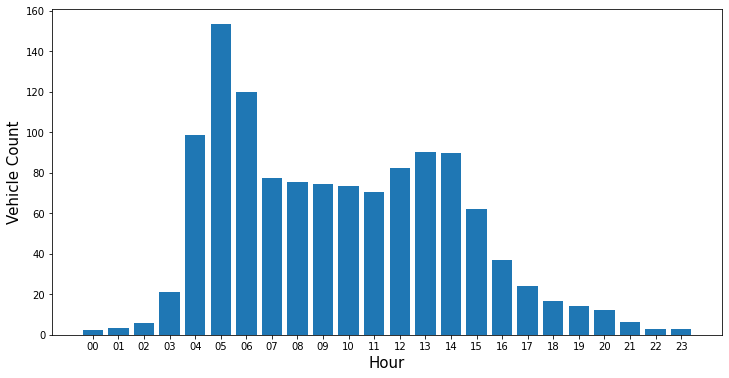

In [42]:
make_bar_chart_by_hour(df_vByHour, 'vehicleCount')

In [44]:
df_vByHour.head(10)

,hour,vehicleCount
0,00,2.350000
1,01,3.300000
2,02,5.916667
3,03,20.983333
4,04,98.516667
5,05,153.355932
6,06,120.016667
7,07,77.524590
8,08,75.508197
9,09,74.400000


In [13]:
def handle_detail_file(df_detail):
    df_detail['year'] = df_detail['TIMESTAMP'].apply(lambda x: x.split('T')[0].split('-')[0])
    df_detail['month'] = df_detail['TIMESTAMP'].apply(lambda x: x.split('T')[0].split('-')[1])
    df_detail['day'] = df_detail['TIMESTAMP'].apply(lambda x: x.split('T')[0].split('-')[2])
    df_detail['hour'] = df_detail['TIMESTAMP'].apply(lambda x: x.split('T')[1].split(':')[0])
    df_detail = df_detail[['year','month','day','hour','avgMeasuredTime','avgSpeed','vehicleCount','REPORT_ID']]
    df_group = df_detail.groupby(['year','month','day', 'hour','REPORT_ID']).agg({'avgMeasuredTime': 'mean','vehicleCount': 'sum','avgSpeed':'mean'}).reset_index()
    return df_group

In [14]:
df_detail = handle_detail_file(df)
df_detail.head(5)

,year,month,day,hour,REPORT_ID,avgMeasuredTime,vehicleCount,avgSpeed
0,2014,08,01,07,158324,73.500000,11,50.000000
1,2014,08,01,08,158324,63.833333,78,57.583333
2,2014,08,01,09,158324,61.833333,75,59.583333
3,2014,08,01,10,158324,64.833333,50,56.833333
4,2014,08,01,11,158324,63.666667,100,57.833333


In [8]:
import os
files = os.listdir('../Dataset/meta_data_date/')
dfs=[]
for file in files:
    dftmp = pd.read_csv('../Dataset/meta_data_date/'+file)
    dfs.append(dftmp)
df = pd.concat(dfs)

In [11]:
df.corr().style.background_gradient(cmap='coolwarm')

,time,avgMeasuredTime,vehicleCount,dewptm,hum,pressurem,tempm,wdird,wspdm,POINT_1_LAT,POINT_2_LAT,POINT_1_LNG,POINT_2_LNG,POINT_1_NAME,POINT_2_NAME,DURATION_IN_SEC,NDT_IN_KMH,REPORT_ID,DISTANCE_IN_METERS
time,1.000000,-0.010415,-0.048402,-0.008027,-0.421839,0.008674,0.346201,-0.024177,0.193560,-0.000229,-0.000129,0.000276,0.000187,-0.000032,-0.000483,-0.000381,-0.000934,0.000493,-0.000926
avgMeasuredTime,-0.010415,1.000000,-0.078952,0.001736,-0.001960,0.004435,0.003174,-0.002168,0.009332,-0.032742,-0.033991,0.015045,0.010358,0.088350,0.075600,0.332685,-0.013174,0.132289,0.269803
vehicleCount,-0.048402,-0.078952,1.000000,-0.011107,-0.068780,-0.012224,0.057566,0.008153,0.099985,0.126408,0.126297,-0.042163,-0.040439,-0.045260,-0.048583,-0.159605,0.329540,-0.314915,0.004616
dewptm,-0.008027,0.001736,-0.011107,1.000000,0.299444,-0.003370,0.518687,-0.316128,-0.122919,-0.000117,-0.000100,-0.000014,-0.000008,-0.000017,-0.000158,-0.000125,-0.000334,0.000092,-0.000346
hum,-0.421839,-0.001960,-0.068780,0.299444,1.000000,0.014078,-0.648375,-0.000188,-0.449146,0.000056,0.000006,-0.000212,-0.000155,-0.000021,0.000197,0.000193,0.000371,-0.000233,0.000396
pressurem,0.008674,0.004435,-0.012224,-0.003370,0.014078,1.000000,-0.009739,-0.443395,-0.237083,0.000130,0.000061,-0.000089,-0.000104,0.000052,0.000297,0.000121,0.000408,-0.000185,0.000355
tempm,0.346201,0.003174,0.057566,0.518687,-0.648375,-0.009739,1.000000,-0.243083,0.269796,-0.000131,-0.000076,0.000172,0.000129,0.000020,-0.000261,-0.000268,-0.000556,0.000263,-0.000606
wdird,-0.024177,-0.002168,0.008153,-0.316128,-0.000188,-0.443395,-0.243083,1.000000,0.146425,-0.000061,-0.000027,0.000022,0.000012,-0.000009,-0.000088,-0.000018,-0.000083,0.000028,-0.000062
wspdm,0.193560,0.009332,0.099985,-0.122919,-0.449146,-0.237083,0.269796,0.146425,1.000000,0.000186,0.000106,-0.000128,-0.000105,0.000027,0.000316,0.000244,0.000637,-0.000286,0.000623
POINT_1_LAT,-0.000229,-0.032742,0.126408,-0.000117,0.000056,0.000130,-0.000131,-0.000061,0.000186,1.000000,0.956393,0.278375,0.259397,-0.027156,-0.029808,-0.136723,0.344042,-0.470929,-0.010649
